<a href="https://colab.research.google.com/github/johnymephisto/Machine-Learning-and-Deep-Learning-Experiments/blob/master/Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
%matplotlib inline

# convert into dataset matrix
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

step = 4
N =   1000
Tp = 600    

t=np.arange(0,N)
x=np.sin(0.02*t) + 2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,0.343936
1,1.858108
2,0.172395
3,0.723194
4,1.557666


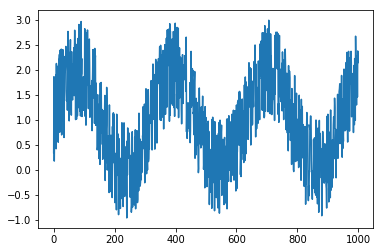

In [0]:
plt.plot(df)
plt.show()

In [0]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX.shape

(600, 1, 4)

In [0]:
trainX[0]

array([[0.34393642, 1.85810805, 0.17239496, 0.72319397]])

In [0]:
trainY[0]

1.5576662706726032

In [0]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu", name='RNN_Layer'))
model.add(Dense(8, activation="relu", name='Dense_Layer_Hidden')) 
model.add(Dense(1, name='Dense_Layer_Output'))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

W0627 14:39:18.402643 140235267413888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 14:39:18.439829 140235267413888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 14:39:18.445946 140235267413888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 14:39:18.602117 140235267413888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
RNN_Layer (SimpleRNN)        (None, 32)                1184      
_________________________________________________________________
Dense_Layer_Hidden (Dense)   (None, 8)                 264       
_________________________________________________________________
Dense_Layer_Output (Dense)   (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

W0627 14:39:35.724370 140235267413888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0627 14:39:35.733447 140235267413888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
 - 1s - loss: 0.7393
Epoch 2/100
 - 0s - loss: 0.4081
Epoch 3/100
 - 0s - loss: 0.3948
Epoch 4/100
 - 0s - loss: 0.3936
Epoch 5/100
 - 0s - loss: 0.3881
Epoch 6/100
 - 0s - loss: 0.3881
Epoch 7/100
 - 0s - loss: 0.3853
Epoch 8/100
 - 0s - loss: 0.3865
Epoch 9/100
 - 0s - loss: 0.3828
Epoch 10/100
 - 0s - loss: 0.3826
Epoch 11/100
 - 0s - loss: 0.3838
Epoch 12/100
 - 0s - loss: 0.3812
Epoch 13/100
 - 0s - loss: 0.3796
Epoch 14/100
 - 0s - loss: 0.3779
Epoch 15/100
 - 0s - loss: 0.3778
Epoch 16/100
 - 0s - loss: 0.3752
Epoch 17/100
 - 0s - loss: 0.3790
Epoch 18/100
 - 0s - loss: 0.3771
Epoch 19/100
 - 0s - loss: 0.3773
Epoch 20/100
 - 0s - loss: 0.3761
Epoch 21/100
 - 0s - loss: 0.3768
Epoch 22/100
 - 0s - loss: 0.3739
Epoch 23/100
 - 0s - loss: 0.3752
Epoch 24/100
 - 0s - loss: 0.3766
Epoch 25/100
 - 0s - loss: 0.3724
Epoch 26/100
 - 0s - loss: 0.3697
Epoch 27/100
 - 0s - loss: 0.3727
Epoch 28/100
 - 0s - loss: 0.3719
Epoch 29/100
 - 0s - loss: 0.3724
Epoch 30/100
 - 0s - lo

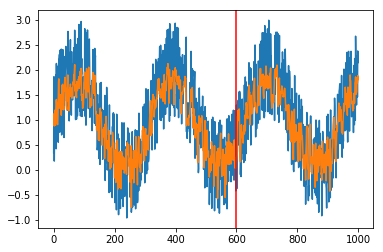

In [0]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()